This notebook is for creating a simple linear regression and finding it's parameter by gradient optimizer.

Let's create the simple simulated dataset first. We will create a high dimesnional feature related dataset from scipy

In [131]:
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize 
import matplotlib.pyplot as plt
X,y=make_regression(n_samples=100, n_features=20,
                                 n_informative=15, n_targets=1, bias=0.0, 
                                 effective_rank=None, tail_strength=0.5, 
                                 noise=0.01, shuffle=True, coef=False, random_state=42)

Let's splite the dataset into test and train points.

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=.2,random_state=42) 

Now, let's create the loss function. For the $D=(X,y)$, where $X\in \Re^K$ the linear prediction function is:
$$f(X)=\alpha+\sum_{j=1}^K \beta_jX_j$$

$\alpha$ represents the intercept whereas $\beta$ represents the slopes of the linear equation. We can find these coeeficients from minimizing the loss function. The Square error loss is taken in this case, which is:
$$J(\theta)=\frac{1}{2N}\sum_i^N(y^i-f(X^i))^2,$$

where $\theta=(\alpha,\beta)$. $i=1,...,N$ represents the index of the data and $j=1,...,K$ represents the index of the features. We can minimize this loss fuction with respect to these coeeficients and get these values which is known as using normal equation. But, for some cases it causes numerical issues if there is some kind of dependency in between $X$'s. We will use gradient descendent method to update these parameters value. The gradient update formula's are:

$$\theta_j:=\theta_j-\frac{\alpha}{N}\sum_i^N(y^i-f(X^i))X_j$$

$\alpha$ here represents the learning rate. 


In [133]:
def linearPredictor(params,features):
    return features.dot(params)
def lossfunction(params,features,target):
    m=features.shape[1]
    return 1/(2*m)*np.sum((target-linearPredictor(params,features))**2)
def gradientupdate(params,features,target):
    m=features.shape[1]
    gr=[0 for _ in range(m)]    
    for i in range(m):
        gr[i]=(linearPredictor(params,features)-target).dot(features[:,i])
    return np.array(gr)

For the convergence criteria, we can use a fixed number of large iteration. But if the improvement in loss is not sufficent, we will make the iteration stop by force as it is already converged.Thus, convergence criteria is:
$$|J(\theta_2)-J(\theta_1)|\leq10^{-20}$$

In [134]:
import numpy as np
#using gradient desencedent method
def opt1(params,features,target,lr=.01,iter=1000000):
    m=features.shape[1]
    iteration=0
    loss1=1e10
    L=[]
    while iteration<iter:
        for i in range(len(params)):
            params[i]=params[i]-lr/m*gradientupdate(params,features,target)[i]
            loss=lossfunction(params,features,target)
            L.append(loss)
            #print(loss)
            if abs(loss1-loss)<1e-20:
                return params,L
            loss1=loss
            iteration+=1
    return params,L

we want to compare gradient descendent results with the scipy build in optimizer.

In [135]:
#using scipy optimizer
def opt2(params,features,target):
    updated_params=minimize(fun=lossfunction,x0=params,jac=gradientupdate,args=(features,target)
                            ,method='BFGS',options={'maxiter':1000,'disp': True})
    return updated_params.fun,updated_params.x 

If we run the GD optimizer and plot the loss fuction at different iteration, we can see that it decrease very fast and at aroun 2000
iteration it achieves close to zero loss. Also the Root mean square value for this model on test function is=0.000216

0.0002162270680101928


Text(0, 0.5, 'Loss')

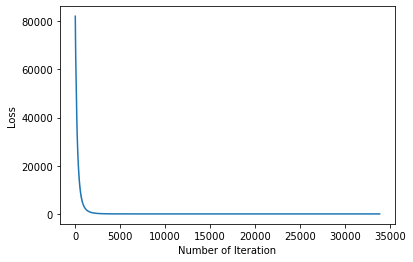

In [136]:
params=[1.0 for i in range(X_train.shape[1])]
updated_params,Loss=opt1(np.array(params),X_train,y_train)
pred=linearPredictor( updated_params,X_test)

print(mean_squared_error(pred,y_test))

plt.plot(range(0,len(Loss)),Loss)
plt.xlabel('Number of Iteration')
plt.ylabel('Loss')

In [137]:
iteration=[1e1,1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10]
LLoss=[]
ACC=[]
for i in range(len(iteration)):
    updated_params,Loss=opt1(np.array(params),X_train,y_train,iter=iteration[i])
    LLoss.append(Loss)
    pred=linearPredictor( updated_params,X_test)
    ACC.append(mean_squared_error(pred,y_test))
minLoss=[LLoss[i][-1] for i in range(len(iteration))]


In [138]:
#plt.boxplot(LLoss)


Also,the following RMSE plot is generated at different number of fixed iteration as a convergence criteria in order to estimate the coeeficients.
we can see that, if we did not provide enough number of iteration, the model performance will be worse whereas giving more iterations then needed is also waste of time.

Text(0, 0.5, 'RMSE value')

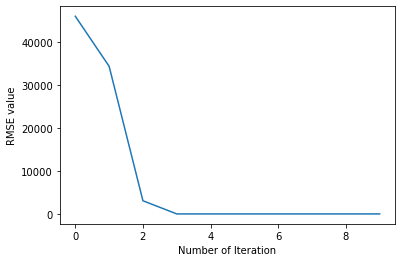

In [139]:
plt.plot(ACC)
plt.xlabel('Number of Iteration')
plt.ylabel('RMSE value')

Now lets use the scipy built in optimizer to ensure that our model is consistant. We can see from the RMSE value in the test data that for both estimation procedure, the RMSE is very close.

In [140]:
    
params=[1.0 for i in range(X_train.shape[1])]
obj,updated_params=opt2(np.array(params),X_train,y_train)
pred=linearPredictor( updated_params,X_test)

print(mean_squared_error(pred,y_test))

Optimization terminated successfully.
         Current function value: 0.000122
         Iterations: 84
         Function evaluations: 191
         Gradient evaluations: 191
0.00021623050127356994
